In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2
from model_equations import *

In [3]:
HCOLOR = '#CC9900'
PCOLOR = '#00CC33'
DOMCOLOR = '#006699'
DIMCOLOR = '#0099CC' #'#000066'

ccbpalette = [PCOLOR, HCOLOR, DOMCOLOR, DIMCOLOR]
ccborder = ['Bp', 'Bh', 'DOM', 'DIM']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hpalette = [ HCOLOR, DOMCOLOR, DIMCOLOR]
horder = [ 'Bh', 'DOM', 'DIM']
ppalette = [ PCOLOR, DOMCOLOR, DIMCOLOR]
porder = [ 'Bp', 'DOM', 'DIM']
sns.color_palette(ccbpalette)

In [4]:
import os
os.listdir()


['.ipynb_checkpoints',
 'debug.xlsx',
 'draft first model run - nmol per ml.ipynb',
 'first model run-Copy1.ipynb',
 'first model run.ipynb',
 'master model notebook.ipynb',
 'model diagram.pptx',
 'model notebook osnat try1.docx',
 'model notebook sep2021 simplified no quota.docx',
 'model notebook sep2021.docx',
 'model_equations.py',
 'model_equations_no_quota.py',
 'model_noquota_cc.ipynb',
 'model_quota_cc.ipynb',
 'model_quota_honly.ipynb',
 'model_quota_ponly.ipynb',
 'prelim bottle.csv',
 'recycle model results 041021.pptx',
 '__pycache__',
 '~$debug.xlsx',
 '~$del notebook sep2021.docx']

In [5]:
refdf = pd.read_csv('prelim bottle.csv')


In [6]:
for c in ['1A3', 'cc 1A3', 'cc mit9312', 'mit9312']:
    refdf[c] = refdf[c] *1e3
refdf.head()

,day,1A3,cc 1A3,cc mit9312,mit9312
0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09
1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09
2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09
3,6.853472,4.987215e+09,2.290707e+09,2.812842e+10,1.576008e+10
4,8.779167,2.867312e+09,1.598094e+09,6.262316e+10,4.113340e+10


In [7]:
print_params()

M_h  = 1.16e-06
M_p  = 1.16e-06
gamma^D_p  = 5.00e-01
gamma^D_h  = 5.00e-01
E^O_p  = 2.31e-06
E^I_p  = 0.00e+00
E^O_h  = 0.00e+00
E^I_h  = 2.31e-06
Qmax_p  = 1.50e-09
Qmin_p  = 7.00e-10
Qmax_h  = 3.14e-08
Qmin_h  = 1.47e-08
KO_p  = 1.10e-01
KI_p  = 1.10e-01
KO_h  = 2.50e-01
KI_h  = 2.50e-01
VmaxO_p  = 0.00e+00
VmaxI_p  = 2.20e-14
VmaxO_h  = 1.69e-13
VmaxI_h  = 1.69e-14
mu_inf_p  = 1.16e-05
mu_inf_h  = 1.74e-05
epsilon  = 1.16e-15
VTmax  = 2.20e-14
KT_h  = 2.50e-01
omega  = 1.00e+00


In [8]:
1.20684E-09


dBp/dt


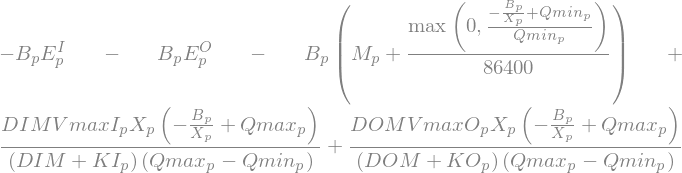

dBh/dt


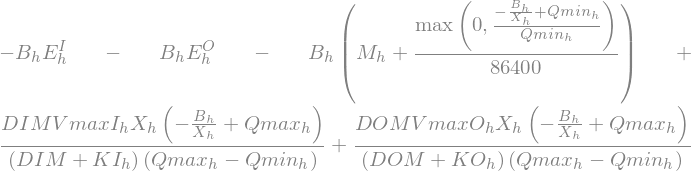

dXp/dt


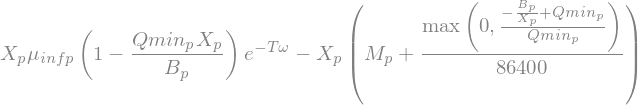

dXh/dt


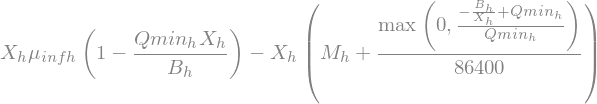

dDOM/dt


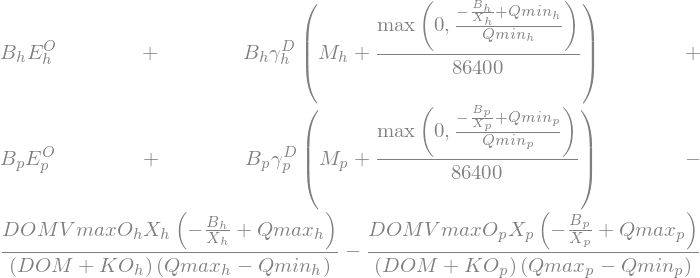

dDIM/dt


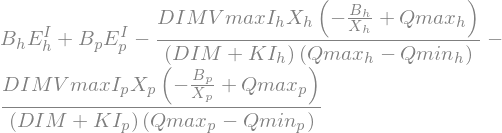

dT/dt


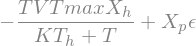

In [9]:
print_equations()


In [10]:
newparams = param_vals.copy()
newparams['omega'] = 0
var_names, init_vars, calc_dydt, interm_names, intermediate_func = \
   get_ponly_data(param_vals=newparams)

In [11]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = 1.95e-05, init Bp = 7.00e-01, newval = 7.00e-01
dXp/dt = -1.16e+03, init Xp = 1.00e+09, newval = 1.00e+09
dDOM/dt = 2.03e-06, init DOM = 5.00e+00, newval = 5.00e+00
dDIM/dt = -2.20e-05, init DIM = 1.00e+02, newval = 1.00e+02
dT/dt = 1.16e-06, init T = 0.00e+00, newval = 1.16e-06


In [12]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Qp   = 7.00e-10
Iuptakep = 2.20e-05
Ouptakep = 0.00e+00
mup  = 1.16e-10
Mstarp = 1.16e-06
growthp = 1.16e-01
deathp = 1.16e+03
exudationOp = 1.62e-06
exudationIp = 0.00e+00
Treleasep = 1.16e-06


In [13]:
biomass_diff0_ponly(calc_dydt, init_vars)


dBp/dt + dDOM/dt + dDIM/dt = -4.050966435185192e-07


In [14]:

for i,j in zip(interm_names, intermediate_func(*init_vars)):
    print(f'{i:<4} = {j:.2e}')

Qp   = 7.00e-10
Iuptakep = 2.20e-05
Ouptakep = 0.00e+00
mup  = 1.16e-10
Mstarp = 1.16e-06
growthp = 1.16e-01
deathp = 1.16e+03
exudationOp = 1.62e-06
exudationIp = 0.00e+00
Treleasep = 1.16e-06


In [15]:
sol = run_solver(calc_dydt, init_vars)

solve_ivp(fun=calc_dydt, y0=[0.7000069999999999, 1000000000.0, 5, 100, 0],
    t_span=[0, 5356800],
    t_eval=t_eval)
The solver successfully reached the end of the integration interval.


In [16]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [17]:
df.head()

,Bp,Xp,DOM,DIM,T,t,day,Qp,Iuptakep,Ouptakep,mup,Mstarp,growthp,deathp,exudationOp,exudationIp,Treleasep
0,0.700007,1.000000e+09,5.000000,100.000000,0.000000,0,0.000000,7.000070e-10,0.000022,0.0,1.157396e-10,0.000001,0.115740,1157.407407,0.000002,0.0,0.000001
1,0.927315,1.007097e+09,5.034236,99.731609,0.016672,14400,0.166667,9.207799e-10,0.000016,0.0,2.775172e-06,0.000001,2794.867817,1165.621670,0.000002,0.0,0.000001
2,1.083741,1.039558e+09,5.076307,99.524698,0.033705,28800,0.333333,1.042501e-09,0.000013,0.0,3.802522e-06,0.000001,3952.943019,1203.192350,0.000003,0.0,0.000001
3,1.202837,1.084016e+09,5.124036,99.348327,0.051389,43200,0.500000,1.109611e-09,0.000012,0.0,4.272551e-06,0.000001,4631.514747,1254.648499,0.000003,0.0,0.000001
4,1.302420,1.135886e+09,5.176276,99.186055,0.069880,57600,0.666667,1.146612e-09,0.000011,0.0,4.508167e-06,0.000001,5120.764572,1314.683070,0.000003,0.0,0.000001


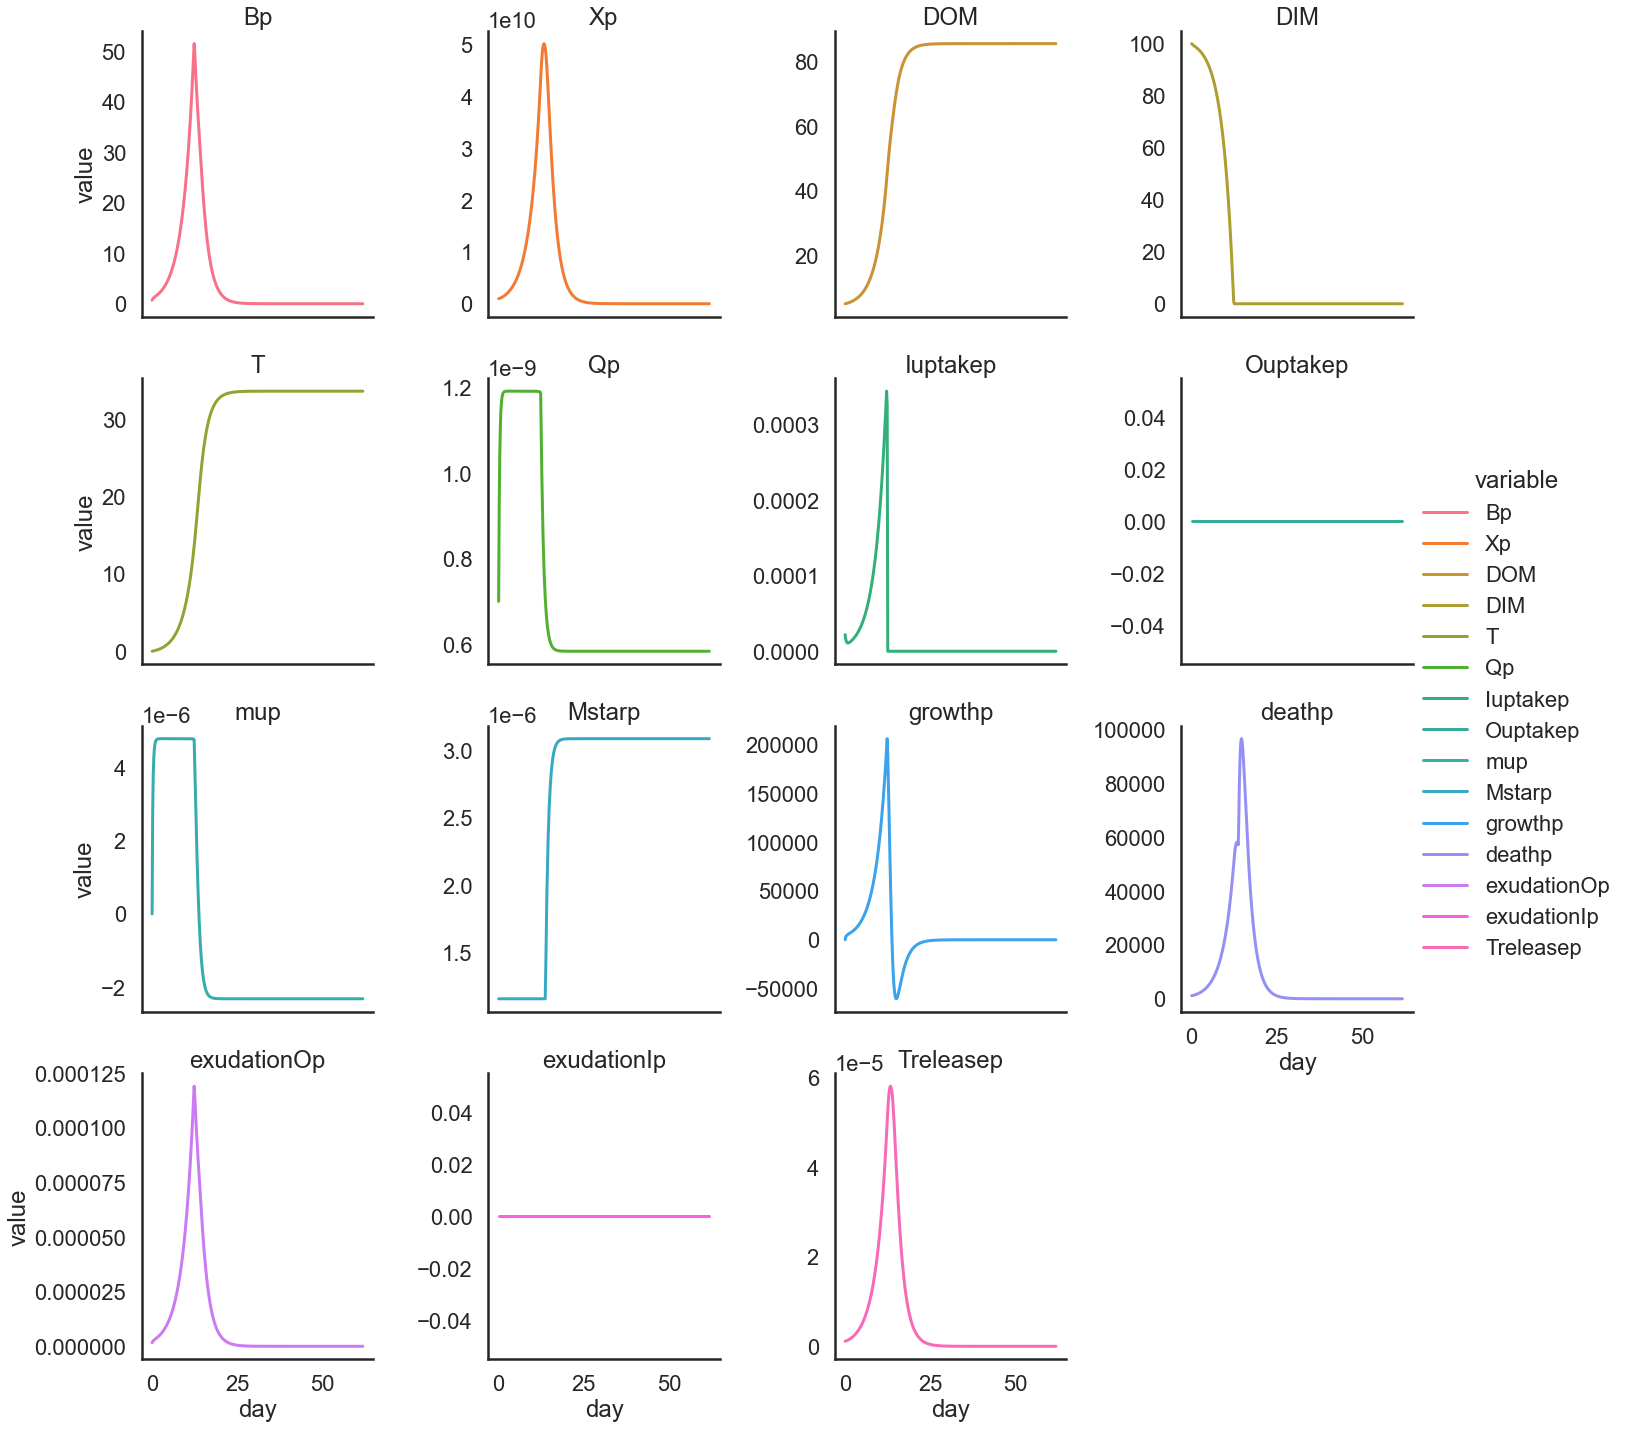

In [18]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=4, facet_kws=dict(sharey=False),
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [19]:
refdf.columns

Index(['day', '1A3', 'cc 1A3', 'cc mit9312', 'mit9312'], dtype='object')

<AxesSubplot:xlabel='day', ylabel='cells/l'>

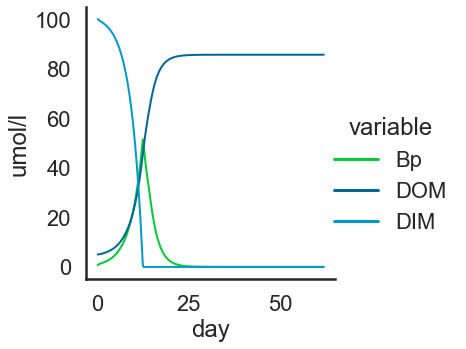

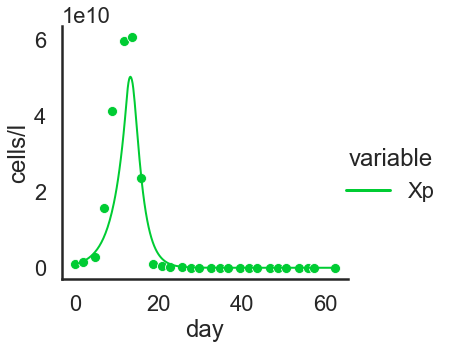

In [20]:
sns.relplot(data=mdf.loc[mdf.variable.isin(['Bp', 'DOM', 'DIM',])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=ppalette, hue_order=porder,
           ).set(ylabel='umol/l')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp',])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=[PCOLOR], 
                
           ).set(ylabel='cells/l')
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)


<AxesSubplot:xlabel='day', ylabel='cells/l'>

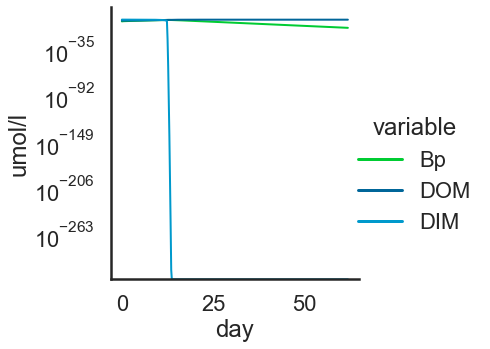

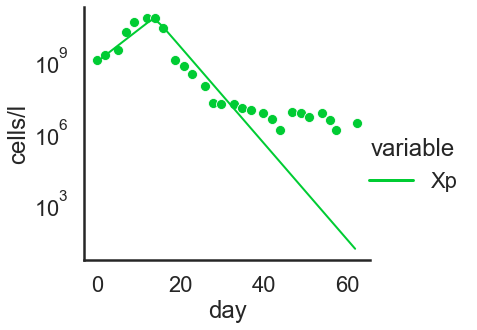

In [21]:
sns.relplot(data=mdf.loc[mdf.variable.isin(['Bp', 'DOM', 'DIM',])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=ppalette, hue_order=porder,
           ).set(ylabel='umol/l', yscale='log')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=[PCOLOR], 
           ).set(ylabel='cells/l', yscale='log')
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)


In [22]:
df.min()

Bp              7.025924e-09
Xp              1.204444e+01
DOM             5.000000e+00
DIM            6.292420e-320
T               0.000000e+00
t               0.000000e+00
day             0.000000e+00
Qp              5.833333e-10
Iuptakep        0.000000e+00
Ouptakep        0.000000e+00
mup            -2.314815e-06
Mstarp          1.157407e-06
growthp        -6.036882e+04
deathp          3.717420e-05
exudationOp     1.626371e-14
exudationIp     0.000000e+00
Treleasep       1.394033e-14
dtype: float64

In [23]:
df.max()

Bp             5.144998e+01
Xp             5.020111e+10
DOM            8.560623e+01
DIM            1.000000e+02
T              3.362694e+01
t              5.342400e+06
day            6.183333e+01
Qp             1.192071e-09
Iuptakep       3.438495e-04
Ouptakep       0.000000e+00
mup            4.777625e-06
Mstarp         3.086420e-06
growthp        2.058135e+05
deathp         9.651384e+04
exudationOp    1.190972e-04
exudationIp    0.000000e+00
Treleasep      5.810314e-05
dtype: float64

In [24]:
df.shape